<a href="https://colab.research.google.com/github/eddy123457/TitanicProj/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(887, 8)
     Pclass  Sex  ...  Parents/Children Aboard     Fare
0         3    1  ...                        0   7.2500
1         1    0  ...                        0  71.2833
2         3    0  ...                        0   7.9250
3         1    0  ...                        0  53.1000
4         3    1  ...                        0   8.0500
..      ...  ...  ...                      ...      ...
882       2    1  ...                        0  13.0000
883       1    0  ...                        0  30.0000
884       3    0  ...                        2  23.4500
885       1    1  ...                        0  30.0000
886       3    1  ...                        0   7.7500

[887 rows x 6 columns]
(887, 6)
0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64
Model accuracy score:  0.8352059925093633
Coefficients:  [[-2.20658079e-03 -2.00116851e+00 -1.36003286e-04 -1.36285903e-03
  -1.10776345e-03  3.3

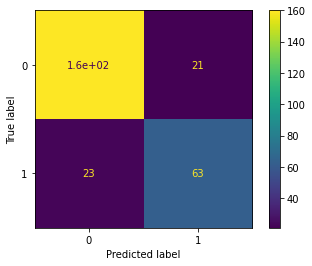

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
df= pd.read_csv('titanic.csv')
df.head()
print(df.shape)
df.loc[df['Sex']=='male','Sex']=int(1)
df.loc[df['Sex']=='female','Sex']=int(0)
df.to_csv('titanic.csv',index=False)
X = df.drop('Survived', axis=1)
X = df[['Pclass', 'Sex', 'Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y = df.Survived

print(X)
print(X.shape)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = SVC(kernel='linear', decision_function_shape='ovo')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Model accuracy score: ', accuracy_score(y_test, y_pred))


print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

DataToPredict = np.array([[3,1.,10,0,2,16.7], [3,0,11,0,2,20], [2,1,21,2,1,23], [2,0,15,0,1,23],[3,0,35,1,2,21],[1,1,36,1,0,130]])
pred = model.predict(DataToPredict)

print("Prediction: ", pred)

print('Predicted Results\n')
for i in range(len(pred)):
    print('\t', DataToPredict[i], '\t', pred[i])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

(887, 8)
     Pclass  Sex  ...  Parents/Children Aboard     Fare
0         3    1  ...                        0   7.2500
1         1    0  ...                        0  71.2833
2         3    0  ...                        0   7.9250
3         1    0  ...                        0  53.1000
4         3    1  ...                        0   8.0500
..      ...  ...  ...                      ...      ...
882       2    1  ...                        0  13.0000
883       1    0  ...                        0  30.0000
884       3    0  ...                        2  23.4500
885       1    1  ...                        0  30.0000
886       3    1  ...                        0   7.7500

[887 rows x 6 columns]


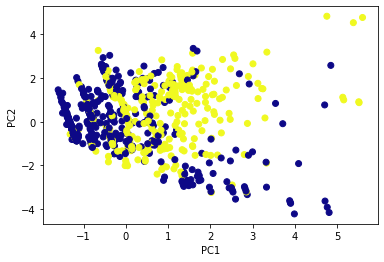

here [[-0.31686541 -0.40363325 -0.10483096  0.43554889  0.51193633  0.52335966]
 [-0.58800443  0.02707931  0.56950706 -0.3668403  -0.27029305  0.34863889]]
0.5233596576381072 5
-0.10483095556026406 2
0.5880044299496181 0
0.027079314429443113 1


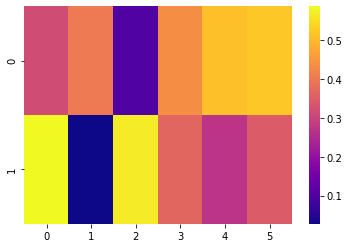

Variance:  [0.29874926 0.29350524]


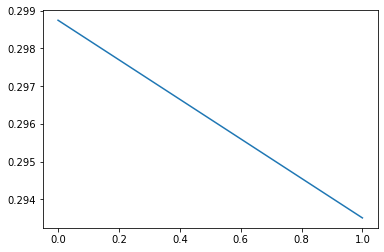

Prediction:  [1 0 1]
Predicted Results

	 [100   1] 	 1
	 [20  3] 	 0
	 [80  2] 	 1
Model accuracy score:  0.704119850187266
Coefficients:  [[ 3.81664784e-05 -9.98764724e-01]]
Intercept:  [1.99556343]
[[145  24]
 [ 55  43]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       169
           1       0.64      0.44      0.52        98

    accuracy                           0.70       267
   macro avg       0.68      0.65      0.65       267
weighted avg       0.69      0.70      0.69       267



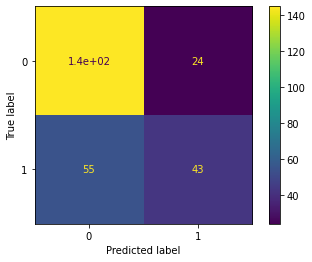

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df= pd.read_csv('titanic.csv')
df.head()
print(df.shape)
df.loc[df['Sex']=='male','Sex']=int(1)
df.loc[df['Sex']=='female','Sex']=int(0)
df.to_csv('titanic.csv',index=False)
X = df.drop('Survived', axis=1)
X = df[['Pclass', 'Sex', 'Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y = df.Survived

print(X)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)


pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print('here',pca.components_)


PC1max = abs(pca.components_[0, 0])
PC1maxIndex = 0
PC1min = abs(pca.components_[0, 0])
PC1minIndex = 0


PC2max = abs(pca.components_[1, 0])
PC2maxIndex = 0
PC2min = abs(pca.components_[1, 0])
PC2minIndex = 0

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) > PC1max):
        PC1max = pca.components_[0, c]
        PC1maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[0, c]) < PC1min):
        PC1min = pca.components_[0, c]
        PC1minIndex = c



for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) > PC2max):
        PC2max = pca.components_[1, c]
        PC2maxIndex = c

for c in range(pca.components_.shape[1]):
    if (abs(pca.components_[1, c]) < PC2min):
        PC2min = pca.components_[1, c]
        PC2minIndex = c

print(PC1max, PC1maxIndex)
print(PC1min, PC1minIndex)

print(PC2max, PC2maxIndex)
print(PC2min, PC2minIndex)



df_comp = abs(pd.DataFrame(pca.components_))

#plt.figure(figsize=(30, 30))
sns.heatmap(df_comp, cmap='plasma')
plt.show()
print('Variance: ', pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)

plt.show()
df= pd.read_csv('titanic.csv')
XX = df.drop('Survived', axis=1)
XX = df[['Fare','Pclass']]


X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30)

model = SVC(kernel='linear', decision_function_shape='ovo')
model.fit(X_train, y_train)
DataToPredict = np.array([[100, 1], [20, 3], [80, 2]])
pred = model.predict(DataToPredict)
print("Prediction: ", pred)

print('Predicted Results\n')
for i in range(len(pred)):
    print('\t', DataToPredict[i], '\t', pred[i])


y_pred = model.predict(X_test)
print('Model accuracy score: ', accuracy_score(y_test, y_pred))
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()
